# Difficulty of Decryption Level of
## of Academic and Popular and Psuedo scientific Language

In [1]:
import pickle
import matplotlib
#matplotlib.use('agg')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try: 
    #assert 1 == 2 # uncomment to break try
    with open('unraveled_links.p','rb') as handle:
        unravel = pickle.load(handle)

except:
    import dask.bag as db
    from t_analysis_purepy import web_iter, map_wrapper
    grid = {}
    #grid['b'] = [0,1,2,3,4]
    query_list = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron', 'Play Dough']
    grid['search_term'] = [ (i, q) for i,q in enumerate(query_list) ]
    from sklearn.grid_search import ParameterGrid
    grid = list(ParameterGrid(grid))
    grid = [(dicti['search_term'][0],dicti['search_term'][1]) for dicti in grid ]
    import dask.bag as db
    grid = db.from_sequence(grid,npartitions = 8)
    list_per_links = list(db.map(web_iter,grid).compute());
    remove_empty = [i for i in list_per_links if len(i)>0 ]
    unravel = []
    for i in remove_empty:
        unravel.extend(i)

    with open('unraveled_links.p','wb') as handle:
        pickle.dump(unravel,handle)
import pandas as pd


In [2]:
'''
unravel = []
for i in remove_empty:
    unravel.extend(i)
with open('unraveled_links.p','wb') as handle:
    pickle.dump(unravel,handle)
print(np.shape(unravel))
'''

"\nunravel = []\nfor i in remove_empty:\n    unravel.extend(i)\nwith open('unraveled_links.p','wb') as handle:\n    pickle.dump(unravel,handle)\nprint(np.shape(unravel))\n"

6.72646635385
1.84172739079
0.0
9.461320428461725
10.063338357424254
0.02708227559787504


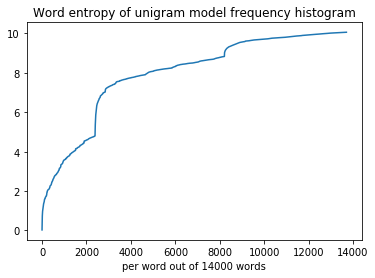

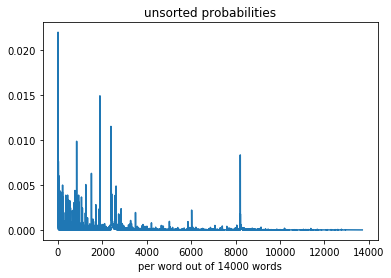

In [3]:
freqs = [  u['frequencies'] for u in unravel ]

freqs = [ (v,k) for f in freqs for k,v in f  ]
# create a dictionary of container keys with all values set to 0.
# Giant model is a federated model of histograms
giantmodel = { fs[0]:0 for fs in freqs }
# if fdict already has count data for that word/token add currently found count data to existing data.
for i in freqs:
    giantmodel[str(i[0])] = giantmodel[str(i[0])] + i[1]
    
gm = sum([ v for k,v in giantmodel.items() ])    
probs = [ (float(v)/gm, k) for k,v in giantmodel.items() ]
probs = [ (p[0],p[1]) for p in probs if p[0] > 0.]
ents = {}
ent = 0
import math
for p in probs:
    if p[0] > 0.:
        ent -= p[0] * math.log(p[0], 2)
        ents[p[1]] = ent
#obj_arr['eofh'] = ent

#print(fdicts)
import pdb
#pdb.set_trace()
#federate_frequencies =  []
yentropies = [ v['eofh'] for v in unravel ]
import numpy as np
print(np.mean(yentropies))
print(np.var(yentropies))
print(min(yentropies))
print(max(yentropies))
print(max([v for v in ents.values() ]))
print(min([v for v in ents.values() ]))

wns = [ x for x in range(0,len(ents)) ]
plt.clf()
plt.plot(wns,list(ents.values()))
plt.title('Word entropy of unigram model frequency histogram')
plt.xlabel('per word out of 14000 words')

#plt.plot(wns,bing_entropies)
#plt.plot(wns,ddg_entropies)


plt.show()

    
plt.clf()
plt.plot(wns,[i[0] for i in probs])

plt.title('unsorted probabilities')
plt.xlabel('per word out of 14000 words')

plt.show()
#print(probs)

288
13702


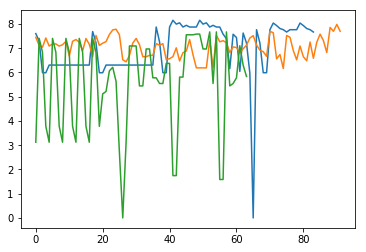

64 288 92


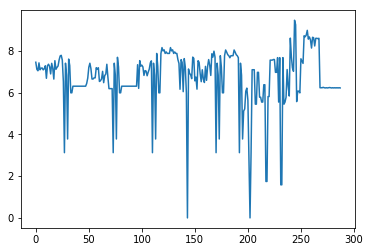

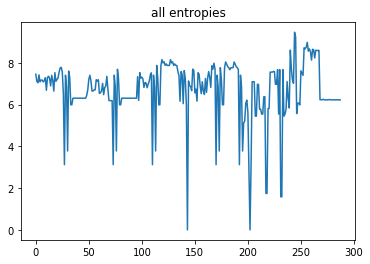

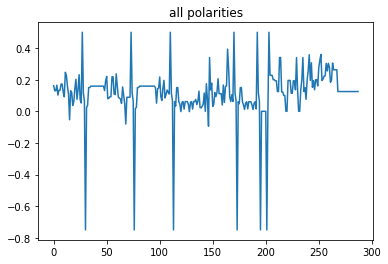

288
(288,)


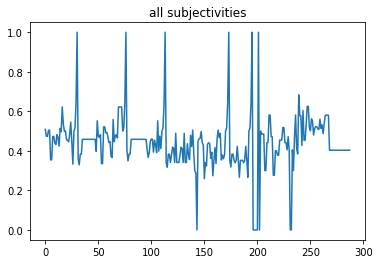

288
(288,)


In [4]:
crude_text = [ f for f in unravel ] 
stat_items = [ f['urlDat'] for f in unravel ] 

unravel[0]['urlDat'];
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from scipy.stats import pearsonr
import numpy as np

rfr = RandomForestRegressor(n_estimators=25)
lm = LinearRegression()

X = [ list(c['urlDat'].values())[0:-1] for c in crude_text ]

print(len(yentropies))
#print(len(word_names))
print(len(ents))

gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
ddg_text = list(filter(lambda x: x['urlDat']['se'] == 'duckduckgo_', crude_text))
bing_text = list(filter(lambda x: x['urlDat']['se'] == 'bing_', crude_text))
gword_names = [ c['urlDat']['keyword'] for c in gsc_text ]
#print(gword_names)
gsc_entropies = [e['eofh'] for e in gsc_text if e['urlDat']['se'] == 'gScholar_' ]
bing_entropies = [e['eofh'] for e in bing_text if e['urlDat']['se'] == 'bing_']
ddg_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'duckduckgo_'] 
yahoo_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'yahoo_'] 
google_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'google_'] 

wns = [ x for x in range(0,len(gsc_text)) ]
plt.clf()
plt.plot([ x for x in range(0,len(gsc_entropies)) ],gsc_entropies)
plt.plot([ x for x in range(0,len(bing_entropies)) ],bing_entropies)
plt.plot([ x for x in range(0,len(ddg_entropies)) ],ddg_entropies)
plt.plot([ x for x in range(0,len(yahoo_entropies)) ],yahoo_entropies)
plt.plot([ x for x in range(0,len(google_entropies)) ],google_entropies)

plt.show()

print(len(ddg_text),len(crude_text),len(bing_text))


all_entropies = [e['eofh'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_entropies)],all_entropies)
plt.show()



all_entropies = [e['eofh'] for e in crude_text ] 
plt.clf()
plt.plot([i for i,j in enumerate(all_entropies)],all_entropies)
plt.title('all entropies')
plt.show()
all_polarities =[e['urlDat']['sp'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_polarities)],all_polarities)
plt.title('all polarities')
plt.show()
print(len(unravel))
print(np.shape(unravel))


all_subjectivities =[e['urlDat']['ss'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_subjectivities)],all_subjectivities)
plt.title('all subjectivities')
plt.show()


print(len(unravel))
print(np.shape(unravel))
#print(ddg_text[-1])
#print(bing_text[-1])

In [5]:

#print(X)
#Xs = [ j 
      
Xs = []
y = []    
for i in X:
    temp = []      
    for k,j in enumerate(i[:-2]):
        if type(j) is not type(str()):
            
            temp.append(j)
        elif y==3:
            y.append(j)
    Xs.append(temp)          
      
features = np.array(Xs)
print(len(Xs),len(yentropies))
target = yentropies
regressor = rfr.fit(features,target)
lm = lm.fit(features,yentropies)

print('linear model regression')
print(lm.score(features,yentropies))
print('random forest regression')
print(regressor.score(features,target))

regressor.verbose = 1
print(regressor)
from sklearn.linear_model import LinearRegression,Lasso

def scorer(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = est.predict(X).squeeze()
    actual = y.squeeze()
    if predicted.var()==0:
        r = 0
    else:
        r,p = pearsonr(predicted,actual)    
    return r



288 288
linear model regression
0.862664691734
random forest regression
0.978063509198
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=1, warm_start=False)


In [6]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA()
data = features
print(np.shape(features))
pca = PCA(n_components=13).fit(data)
data_rotated = np.dot(pca.components_,data.T).T


        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))
name='word_complexity'
#summarize(data_rotated,name)        
report_mean_var(data_rotated)
        

(288, 13)
Dimension 1 has mean 1.2e+03 and variance 4.69e+06
Dimension 2 has mean 1.3e+02 and variance 2.51e+05
Dimension 3 has mean -27 and variance 4.34e+04
Dimension 4 has mean 1.9 and variance 2.8e+03
Dimension 5 has mean 24 and variance 1.78e+03
Dimension 6 has mean -21 and variance 185
Dimension 7 has mean 14 and variance 125
Dimension 8 has mean -18 and variance 9.52
Dimension 9 has mean 4.5 and variance 4.74
Dimension 10 has mean -12 and variance 0.3
Dimension 11 has mean 0.84 and variance 0.00864
Dimension 12 has mean 0.18 and variance 0.00752
Dimension 13 has mean -3.9 and variance 0.0035


In [7]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
km = KMeans(n_clusters=7)
clustered = km.fit(features)
print(clustered)

fignum = 1
#titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
#for name, est in estimators:
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#est.fit(f)
#labels = est.labels_

ax.scatter(features[:, 3], features[:, 0], features[:, 2], edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
#ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [8]:
bings = [ f for f in unravel if f['urlDat']['se'] =='bing_']
googles = [ f for f in unravel if f['urlDat']['se'] =='google_']
GMOs = [ f for f in unravel if f['urlDat']['keyword'] =='GMO']
GMO_standard = [ f['urlDat']['standard'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_pol = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_sent = [ f['urlDat']['ss'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
crude_text = [ f for f in unravel ] 
stat_items = [ f['urlDat'] for f in unravel ] 
gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
unravel[0]['urlDat']
gsc = list(filter(lambda x: x['se'] == 'gScholar_', stat_items))
scholar_wc = [ f['wcount'] for f in gsc ] 

In [9]:
print(scholar_wc)



[914, 679, 113, 113, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 870, 689, 113, 113, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 796, 637, 113, 113, 796, 773, 734, 770, 796, 661, 796, 796, 796, 773, 734, 770, 796, 661, 796, 796, 734, 758, 630, 743, 776, 522, 775, 812, 563, 1, 763, 748, 113, 113, 763, 739, 832, 805, 763, 553, 763, 763, 763, 739, 832, 805, 763, 553]


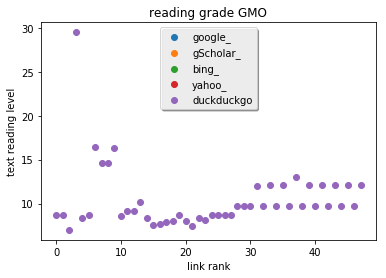

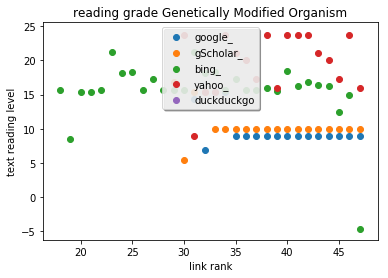

In [10]:
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'
se[4] = 'duckduckgo'

ses = list(se.values())
#search_query = str('Vaccine')
searchList = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Play Dough', 'Neutron']
xx = []
yy = []
for outer,search_query in enumerate(searchList):    
    x = []
    y = []
    for i,v in enumerate(ses):
        #print(i,v)
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        x.append(rank)
        y.append(complexity)
    #if len(xx)!= 0 and len(yy) !=0:
    xx.append(x)
    yy.append(y)
    #print(len(complexity),len(rank))
plt.clf()

fig, ax = plt.subplots()
plt.title(str('reading grade ')+'GMO')
plt.ylabel('text reading level')
plt.xlabel('link rank')
plt.scatter(xx[0][0],yy[0][0],label=ses[0])
plt.scatter(xx[1][0],yy[1][0],label=ses[1])
plt.scatter(xx[2][0],yy[2][0],label=ses[2])
plt.scatter(xx[3][0],yy[3][0],label=ses[3])
plt.scatter(xx[4][0],yy[4][0],label=ses[4])

legend = ax.legend(loc='upper center', shadow=True)
plt.show()
#plt.savefig('rank_versus_complexity_{0}.png'.format(search_query))
plt.clf()

fig, ax = plt.subplots()
plt.title(str('reading grade ')+'Genetically Modified Organism')
plt.ylabel('text reading level')
plt.xlabel('link rank')
plt.scatter(xx[0][1],yy[0][1],label=ses[0])
plt.scatter(xx[1][1],yy[1][1],label=ses[1])
plt.scatter(xx[2][1],yy[2][1],label=ses[2])
plt.scatter(xx[3][1],yy[3][1],label=ses[3])
plt.scatter(xx[4][1],yy[4][1],label=ses[4])

legend = ax.legend(loc='upper center', shadow=True)
plt.show()



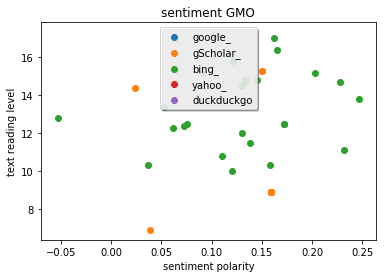

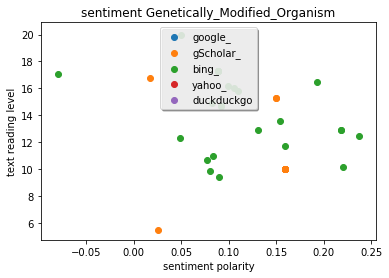

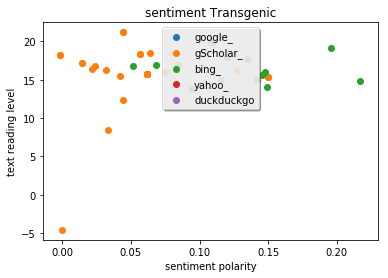

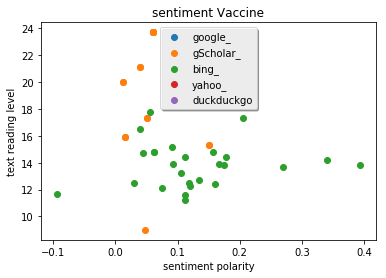

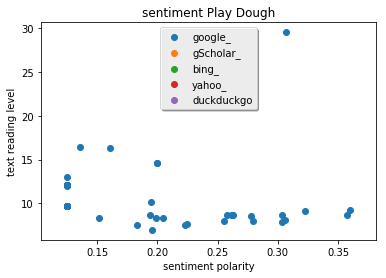

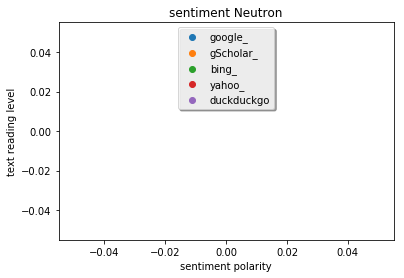

In [11]:
# 2.       Pro/anti/neutral vs. text complexity#

for outer,search_query in enumerate(searchList):    
    x = []
    y = []
    for i,v in enumerate(ses):
        #print(i,v)
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        sent = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        #print(complexity[0][0],complexity[0][0])
        x.append(sent)
        y.append(complexity)

    fig, ax = plt.subplots()
    plt.title(str('sentiment ')+search_query)
    plt.ylabel('text reading level')
    plt.xlabel('sentiment polarity')
    labels = [ses[0],ses[1],ses[2],ses[3]]
    #lineObjects = 
    plt.scatter(x[0],y[0],label=ses[0])
    plt.scatter(x[1],y[1],label=ses[1])
    plt.scatter(x[2],y[2],label=ses[2])
    plt.scatter(x[3],y[3],label=ses[3])
    plt.scatter(x[4],y[4],label=ses[4])
    #plt.scatter(x[5],y[5],label=ses[5])



    legend = ax.legend(loc='upper center', shadow=True)
    plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
    plt.show()

    plt.clf()
plt.show()
#plt.close()


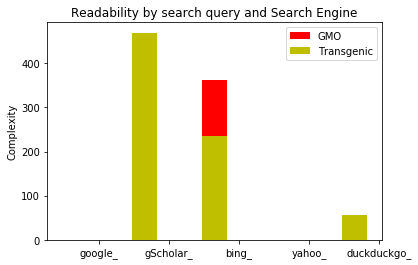

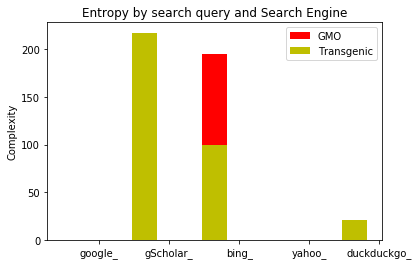

[[0, 167.60000000000005, 363.0, 0, 56.5], [0, 468.79999999999984, 234.79999999999998, 0, 56.5]]
[[0, 108.83267505694356, 194.93744658446312, 0, 21.13848429648908], [0, 217.3643728836524, 99.60491991959657, 0, 21.13848429648908]]


In [12]:
# 3.       GMO/transgenics vs. text complexity

import seaborn as sns
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'
se[4] = 'duckduckgo_'

ses = list(se.values())
#search_query = str('Vaccine')
search_query = ['GMO','Transgenic']
xx=[]
yy=[]
ee=[]
for outer,sq in enumerate(search_query):    
    x = []
    y = []
    e = []
    for i,v in enumerate(ses):
        comp = sum([ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v ])

        entropy = sum([ f['eofh'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v  ])
        #if len(complexity)>0:
         #   comp = float(complexity[0])
        #else:
        #    comp = 0
        xx.append(i)
        y.append(comp)
        e.append(entropy)
    yy.append(y)
    ee.append(e)
    
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(ses)]
offset = [(i+width) for i,v in enumerate(ses)]
rects1 = ax.bar(ind,yy[0],width, color='r')# yerr=men_std)
rects2 = ax.bar(ind, yy[1], width, color='y')#, yerr=women_std)
# add some text for labels, title and axes ticks
ax.set_ylabel('Complexity')
ax.set_title('Readability by search query and Search Engine')
ax.set_xticks(offset)
ax.set_xticklabels((se[0], se[1], se[2], se[3],se[4]))#, 'G5'))

ax.legend((rects1[0], rects2[0]), ('GMO', 'Transgenic'))
plt.show()


plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(ses)]
offset = [(i+width) for i,v in enumerate(ses)]
rects1 = ax.bar(ind,ee[0],width, color='r')# yerr=men_std)
rects2 = ax.bar(ind, ee[1], width, color='y')#, yerr=women_std)
ax.set_ylabel('Complexity')
ax.set_title('Entropy by search query and Search Engine')
ax.set_xticks(offset)
ax.set_xticklabels((se[0], se[1], se[2], se[3],se[4]))#, 'G5'))

ax.legend((rects1[0], rects2[0]), ('GMO', 'Transgenic'))
plt.show()
#plt.savefig('GMO_Transgenic_complexity_{0}{1}.png'.format(search_query[0],search_query[1]))
import numpy as np
print(yy)
print(ee)

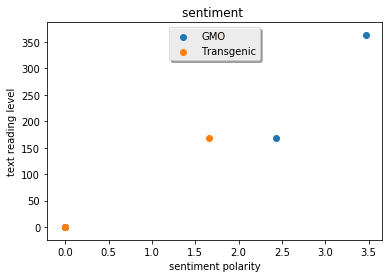

In [13]:

import seaborn as sns
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'

ses = list(se.values())
search_query = str('Vaccine')
search_query = ['GMO','Transgenic']
xx=[]
yy=[]
for outer,sq in enumerate(search_query):    
    x = []
    y = []
    for i,v in enumerate(ses):
        comp = sum([ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v ])
        #complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v and f['urlDat']['link_rank'] == 0 ]
        sent = sum([ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] == sq and f['urlDat']['se'] == v ])
        '''
        if len(complexity)>0:
            comp = float(complexity[0])
        else:
            comp = 0
        if len(sent)>0:
            sent = float(sent[0])
        else:
            sent = 0
        '''
        xx.append(i)
        y.append((comp,sent))    
    yy.append(y)
#print(len(complexity),len(rank))
#fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
#width = 0.35       # the width of the bars
#plt.clf()
#fig, ax = plt.subplots()

#f, axarr = plt.subplots(1, sharex=True)
ind = [i for i,v in enumerate(ses)]
offset = [(i+width)/2.0 for i,v in enumerate(ses)]


fig.clf()
fig, ax = plt.subplots()
plt.title(str('sentiment '))#+search_query)
plt.ylabel('text reading level')
plt.xlabel('sentiment polarity')
#lineObjects = 
sentt0 = [sent[1] for sent in yy[0] ]
complexity0 = [comp[0] for comp in yy[0] ]
plt.scatter(sentt0,complexity0,label='GMO')
sentt1 = [sent[1] for sent in yy[1] ]
complexity1 = [sent[0] for sent in yy[0] ]
plt.scatter(sentt1,complexity1,label='Transgenic')


legend = ax.legend(loc='upper center', shadow=True)
#plt.savefig('Figure2{0}{1}.png'.format(search_query[0],search_query[1]))
plt.show()
